In [5]:
import os
base_path = os.path.dirname(os.path.abspath(""))
base_path = base_path + "/headers/"
print(base_path)
header_path = base_path + 'header_data_treatment.ipynb'
app_name = 'desc_stats'
%run $header_path $app_name

C:\Users\raphael.wargon\Documents\GitHub\sorting_univ\script/headers/
desc_stats


In [6]:
panel_smoothed_w_theses= spark.read.parquet('file:\\' + save_path + 'panel_smoothed_w_theses.parquet')

In [8]:
panel_smoothed_w_theses.show()

+-----------+----+-----------+---------------+-----------+------------------+-------------------+--------+----------------+-------------+-------------------+-----------------------+-----------------------+-----------------------+-----------------------+----------------------+--------------------+----------+-------+--------------------+-----+-------+----+----------+---------+-----------+------------+----------+--------------------+------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+--------------------+-----------+--------------------+-----------+--------------+----------------------+-----------------------------+-------------------+--------------------------+----------------+-----------------------+--------------------+--------------+------------------+---------------+------------+
|  author_id|year|    inst_id|new_inst_period|period_inst|last_y_inst_period|first_y_inst

In [9]:
panel_smoothed_w_theses.filter(func.col('publications_raw')>0).summary().show()

+-------+-----------+-----------------+----------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------------+-----------------------+-----------------------+-----------------------+----------------------+--------------------+---------+-------+-------------------+------------------+-------------------+------------------+------------------+------------------+------------------+----------+-------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-----------------+--------------------+--------------------+--------------------+----------------------+-----------------------------+-------------------+--------------------------+--------------------+-----------------------+--------------------+------------------+
|summary|  author_id|             

In [10]:
test_econ = (panel_smoothed_w_theses
            .filter(func.col('inst_id').isin("I57995698" #pse
                                             , 'I2802331213' #psb
                                             ,"I4210092408" #tse
                                             ,'I4210144888' #business france
                                            ))
            )
test_econ.cache()
test_econ.show()

+-----------+----+-----------+---------------+-----------+------------------+-------------------+--------+----------------+-------------+-------------------+-----------------------+-----------------------+-----------------------+-----------------------+----------------------+--------------------+----------+-------+--------------------+-----+-------+----+----------+---------+-----------+------------+----------+--------------------+------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+--------------------+-----------+-----------------+--------------------+--------------------+----------------------+-----------------------------+--------------------+--------------------------+--------------------+-----------------------+--------------------+--------------+------------------+---------------+------------+
|  author_id|year|    inst_id|new_inst_period|period_inst|last_y_inst_pe

In [13]:
test_econ.select(*[col for col in test_econ.columns if 'raw' in col]).summary().show()

+-------+-----------------+------------------+-------------------+-----------------------+-----------------------+-----------------------+-----------------------+----------------------+
|summary| publications_raw|     citations_raw|avg_rank_source_raw|nr_source_btm_50pct_raw|nr_source_mid_40pct_raw|nr_source_top_20pct_raw|nr_source_top_10pct_raw|nr_source_top_5pct_raw|
+-------+-----------------+------------------+-------------------+-----------------------+-----------------------+-----------------------+-----------------------+----------------------+
|  count|             3993|              3993|               3025|                   3025|                   3025|                   3025|                   3025|                  3025|
|   mean|5.142749812171299|117.11970949161032| 0.8500995086729365|    0.23768595041322313|     0.6317355371900827|     1.9269421487603307|     1.6469421487603306|    1.3342148760330579|
| stddev|7.421004025957143|386.66306760591516|0.18761385968670102|    

In [28]:
test_econ.filter( (func.col('avg_rank_source_raw')>0.9)
                # & (func.col('publications_raw')<3)
                 & (func.col('inst_id')=="I4210144888") & 
                 (func.col('main_field')== 'econ') ).select('author_id','author_name','year', *[col for col in test_econ.columns if 'raw' in col]).show()

+-----------+--------------------+----+----------------+-------------+-------------------+-----------------------+-----------------------+-----------------------+-----------------------+----------------------+
|  author_id|         author_name|year|publications_raw|citations_raw|avg_rank_source_raw|nr_source_btm_50pct_raw|nr_source_mid_40pct_raw|nr_source_top_20pct_raw|nr_source_top_10pct_raw|nr_source_top_5pct_raw|
+-----------+--------------------+----+----------------+-------------+-------------------+-----------------------+-----------------------+-----------------------+-----------------------+----------------------+
|A5015640288|        Arvind Ashta|2015|               7|           85| 0.9528712228293752|                      0|                      0|                      4|                      4|                     2|
|A5018135518| Guillaume Bagnarosa|2020|               2|           19| 0.9344877061092536|                      0|                      1|                      

In [29]:
test_econ.filter( (func.col('avg_rank_source_raw')>0.9)
                # & (func.col('publications_raw')<3)
                 & (func.col('inst_id')=="I4210144888") & 
                 (func.col('main_field')== 'econ') ).select('author_id','author_name').distinct().show()

+-----------+--------------------+
|  author_id|         author_name|
+-----------+--------------------+
|A5015640288|        Arvind Ashta|
|A5030649074| Dieter Vanwalleghem|
|A5018135518| Guillaume Bagnarosa|
|A5040522970|J. François Outre...|
|A5019717059|       Amine Lahiani|
|A5052111985|       Khaled Guesmi|
+-----------+--------------------+



In [30]:
works_au_af_subset = spark.read.parquet('file:\\' + save_path + 'works_au_af_subset.parquet') 

In [33]:
works_au_af_subset.filter(func.col('author_id')=="A5040522970").filter(func.col('publication_year')==2019).show(truncate = False)

+-----------+-----------+-----------+---------+----------+-----------+---------+----------------+--------+----------+------------------------+----------+-------+-----------------------------------------------------------------------------------------------+-----+-------+----+---------+
|work_id    |inst_id    |author_id  |last_year|entry_year|n_pub_in_FR|n_y_in_FR|publication_year|language|source_id |inst_name               |inst_type |country|parent                                                                                         |fused|uni_pub|cnrs|citations|
+-----------+-----------+-----------+---------+----------+-----------+---------+----------------+--------+----------+------------------------+----------+-------+-----------------------------------------------------------------------------------------------+-----+-------+----+---------+
|W2981994329|I4210144888|A5040522970|2020     |2012      |13         |6        |2019            |en      |S99313352 |Business France       

In [34]:
works_au_af_subset.filter(func.col('author_id')=="A5019717059").filter(func.col('publication_year')==2019).show(truncate = False)

+-----------+-----------+-----------+---------+----------+-----------+---------+----------------+--------+----------+--------------------------------------------+----------+-------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+-------+----+---------+
|work_id    |inst_id    |author_id  |last_year|entry_year|n_pub_in_FR|n_y_in_FR|publication_year|language|source_id |inst_name                                   |inst_type |country|parent                                                                                                                       

In [35]:
journals_ranking = (spark.read.format('parquet').load('file:\\' + main_path_openalex + 'journals_ranking_year.parquet')
                    .withColumn('source_id', func.regexp_replace(func.col('source_id'), 'https://openalex.org/', ''))
                   )
journals_ranking.cache()
journals_ranking.show()

+-----------+----+-----------+------------------+------------------+
|  source_id|year|source_type|   rank_source_pct|   abs_rank_source|
+-----------+----+-----------+------------------+------------------+
| S100028386|2000|    journal|0.8187134502923976|             217.0|
| S100045985|1957|    journal|0.8255395683453237|              98.0|
| S100045985|1985|    journal|0.9227373068432672|             176.0|
| S100045985|2001|    journal|0.9590356722853783|             210.0|
| S100062655|2013|    journal|0.8979432336514213|1085.4476190476191|
|S1000839972|1999|    journal|0.8367626886145405|             238.0|
|S1000839972|2017|    journal|0.8949784017278618|             388.0|
|S1000944648|2016|    journal| 0.807972611464417|2328.6081081081084|
|S1000944648|2017|    journal|0.8922782643712877|            2132.0|
|S1000944648|2019|    journal|0.6022198843945348|          6325.625|
| S100105777|2016|    journal|0.5854789417204764| 5389.076923076924|
|  S10012645|1987|    journal|0.88

In [37]:
(works_au_af_subset
 .filter(func.col('author_id')=="A5040522970")
 .filter(func.col('publication_year')==2019)
 .withColumnRenamed('publication_year','year')
 .join(journals_ranking, on =['source_id','year'], how = 'left')
).show(truncate = False)

+----------+----+-----------+-----------+-----------+---------+----------+-----------+---------+--------+------------------------+----------+-------+-----------------------------------------------------------------------------------------------+-----+-------+----+---------+-----------+------------------+------------------+
|source_id |year|work_id    |inst_id    |author_id  |last_year|entry_year|n_pub_in_FR|n_y_in_FR|language|inst_name               |inst_type |country|parent                                                                                         |fused|uni_pub|cnrs|citations|source_type|rank_source_pct   |abs_rank_source   |
+----------+----+-----------+-----------+-----------+---------+----------+-----------+---------+--------+------------------------+----------+-------+-----------------------------------------------------------------------------------------------+-----+-------+----+---------+-----------+------------------+------------------+
|S129686714|2019|W2953581

In [16]:
test_econ_to_plot = (test_econ.groupBy('inst_id','year')
                     .agg(*[func.mean(col).alias(col) for col in test_econ.columns if 'raw' in col])).toPandas()

In [18]:
test_econ_to_plot['inst_id'] = pd.Categorical(test_econ_to_plot['inst_id'], sorted(list(set(test_econ_to_plot['inst_id']))))

C:\Users\raphael.wargon\AppData\Local\Temp\ipykernel_28804\1568416090.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([round(x, 4) for x in current_values])
C:\Users\raphael.wargon\AppData\Local\Temp\ipykernel_28804\1568416090.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([round(x, 4) for x in current_values])
C:\Users\raphael.wargon\AppData\Local\Temp\ipykernel_28804\1568416090.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([round(x, 4) for x in current_values])
C:\Users\raphael.wargon\AppData\Local\Temp\ipykernel_28804\1568416090.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or u

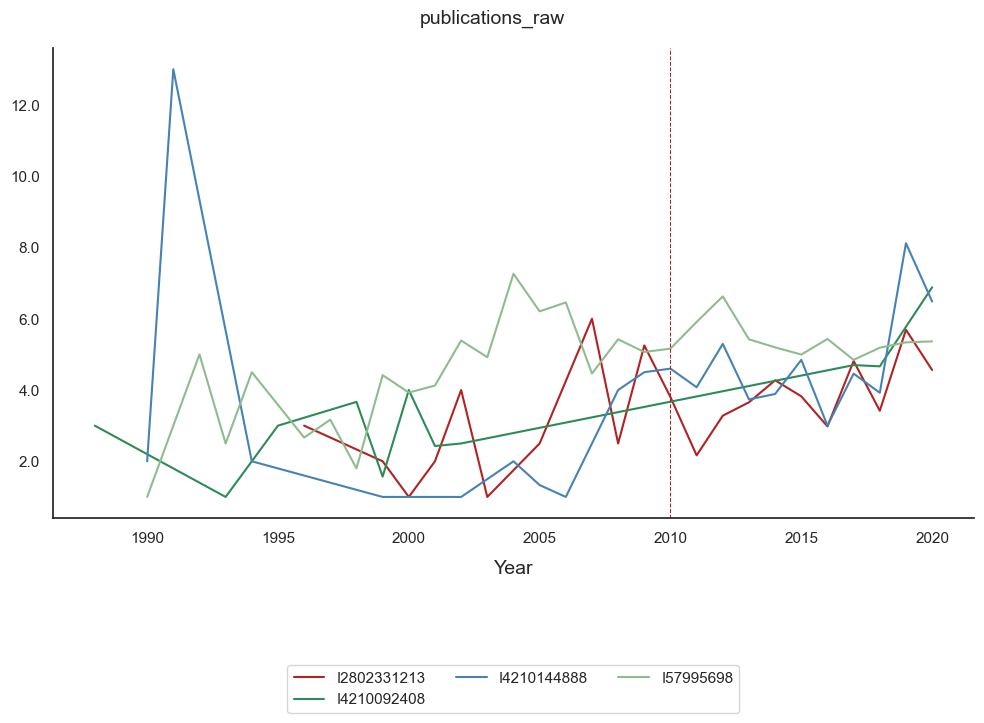

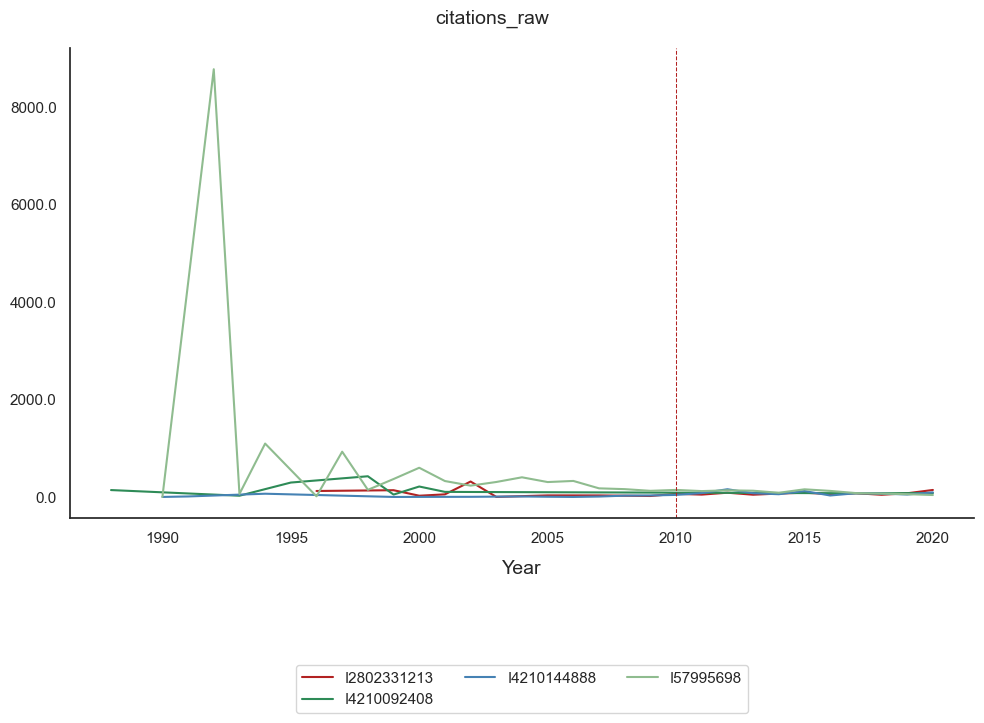

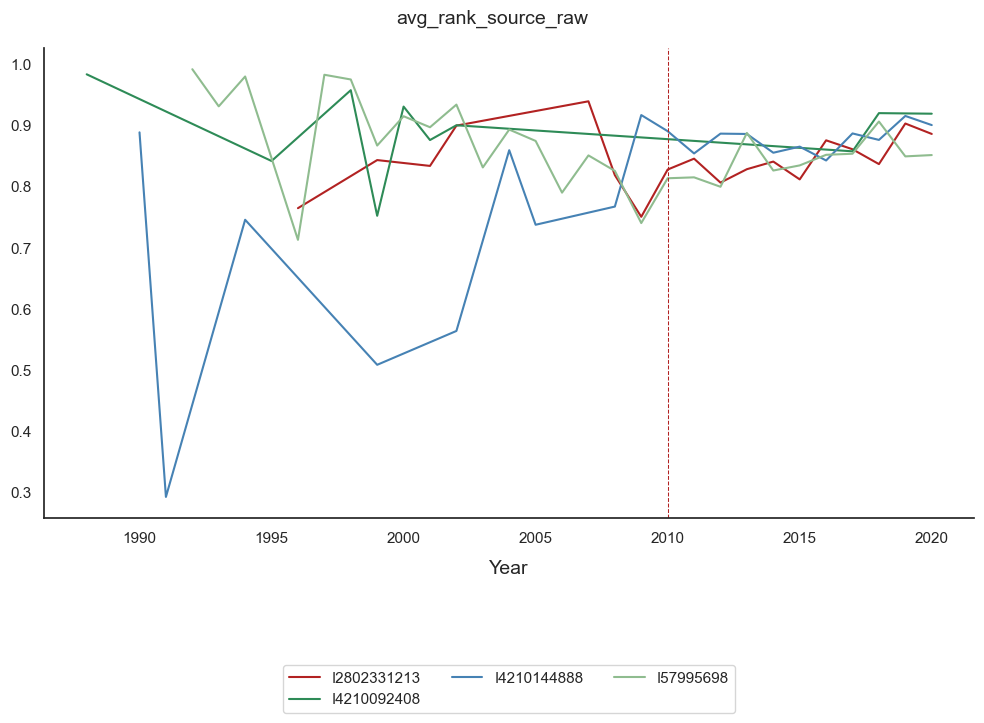

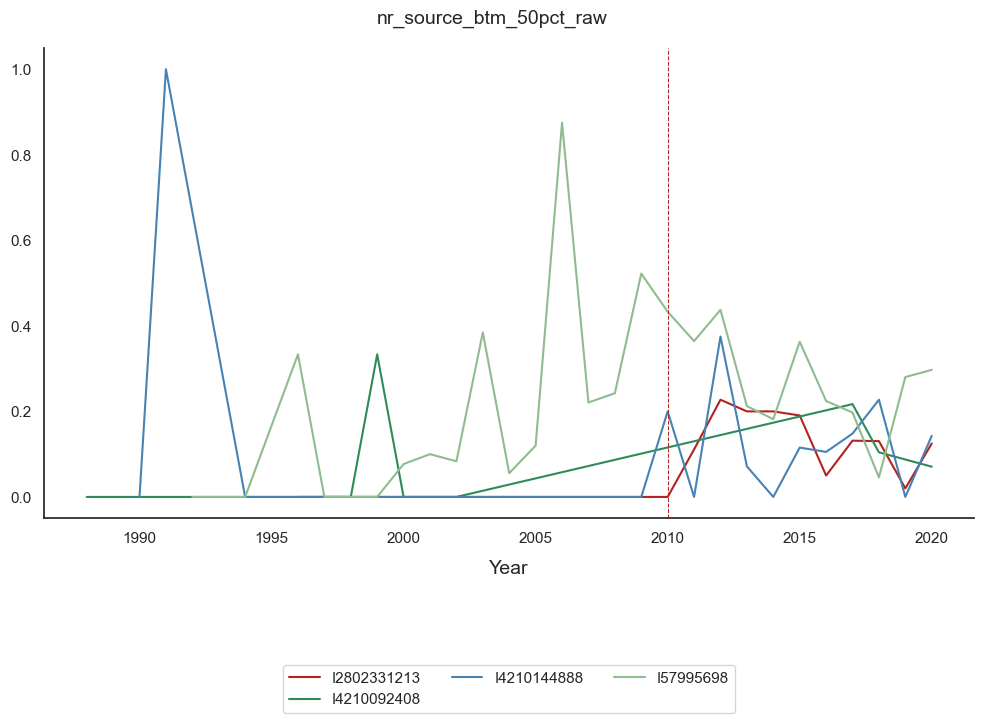

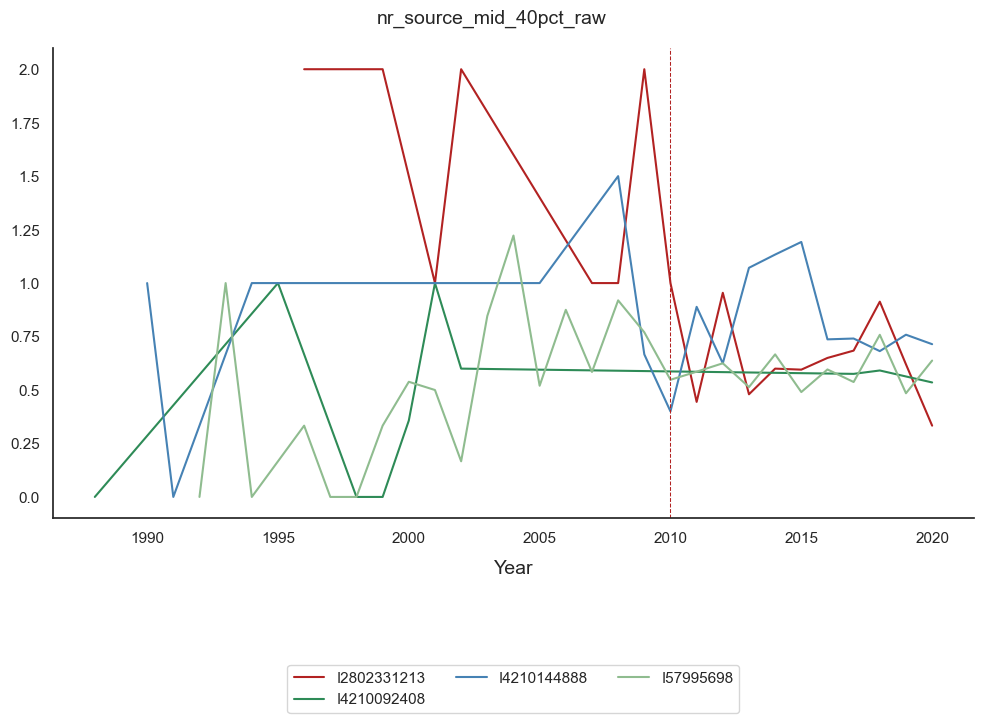

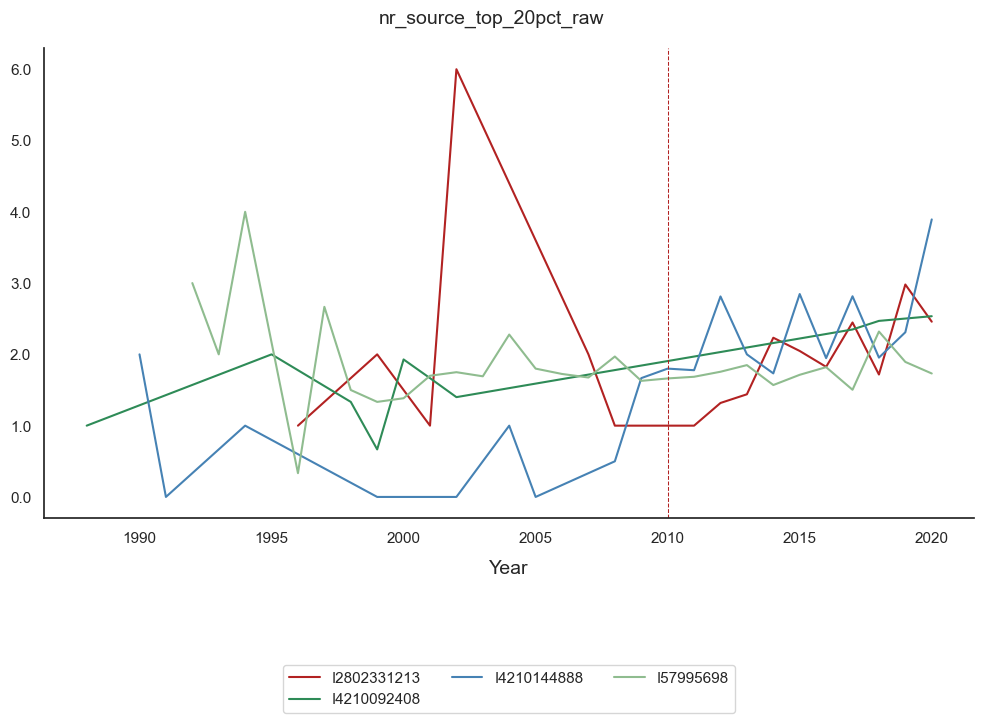

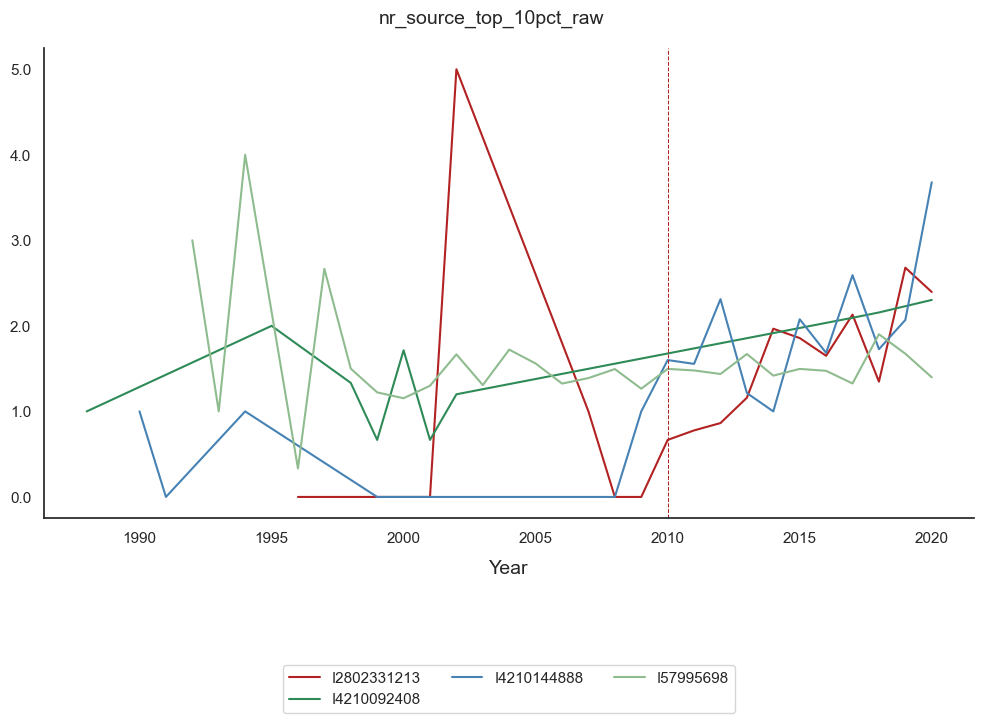

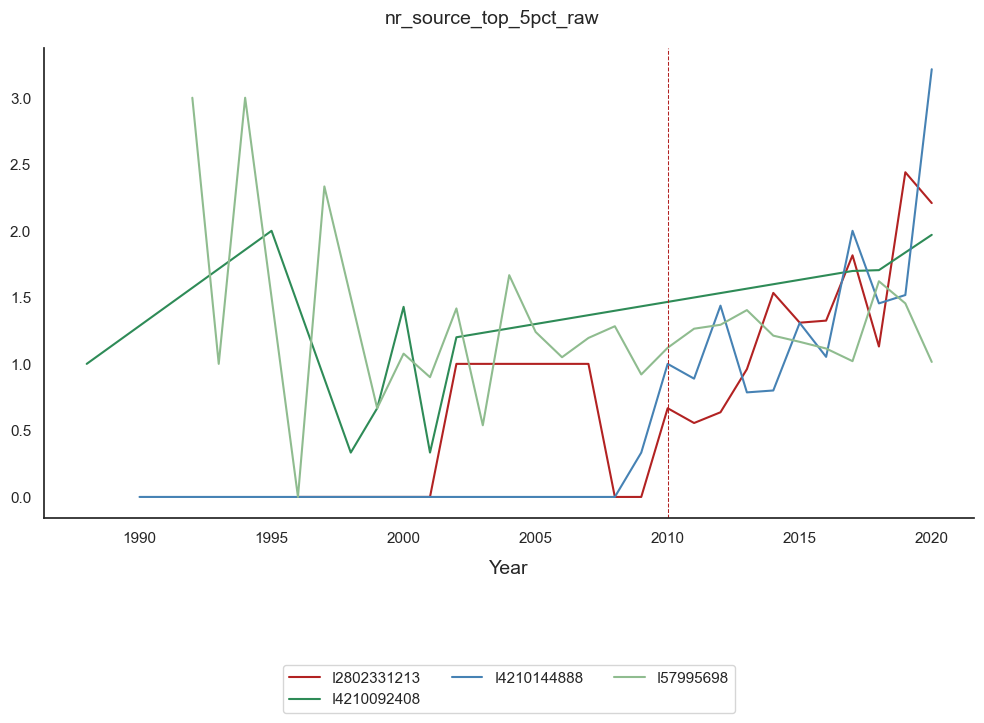

In [20]:
year_of_change = [2010]
for y in [col for col in test_econ.columns if 'raw' in col]:
    graph_3(test_econ_to_plot, 'year', y, 'inst_id', sorted(list(set(test_econ_to_plot['inst_id']))))

In [14]:
test_econ.filter('publications_raw=258').show(truncate = False)

+-----------+----+---------+---------------+-----------+------------------+-------------------+--------+----------------+-------------+-------------------+-----------------------+-----------------------+-----------------------+-----------------------+----------------------+-------------------------+---------+-------+--------------------+-----+-------+----+----------+---------+-----------+------------+----------+------------+------------+------------------+---------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-----------------------------------------------------------------------------------------------------------------------------+-----------+-----------------+-----------+--------------+----------------------+-----------------------------+-------------------+--------------------------+----------------+-----------------------+-------------------+--------------+------------------+---------------+------------+
|au

In [15]:
test_econ.filter('nr_source_top_10pct_raw=54').show(truncate = False)

+-----------+----+-----------+---------------+-----------+------------------+-------------------+--------+----------------+-------------+-------------------+-----------------------+-----------------------+-----------------------+-----------------------+----------------------+----------------------------+---------+-------+--------------------------------------------------------+-----+-------+----+----------+---------+-----------+------------+----------+--------------+------------+-----------------+-----------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+---------------------------------------------------------------------------------------------------------------------+-----------+-----------------+-----------+--------------+----------------------+-----------------------------+-------------------+--------------------------+----------------+-----------------------+-------------------+--------------+----------